In [20]:
from keras.datasets import reuters

(train_data,train_labels),(test_data, test_labels)=reuters.load_data(num_words=1000)

In [21]:
train_data.shape #(8982,)
train_labels.shape #(8982,)
test_data.shape #(2246,)
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [22]:
len(train_labels)

8982

In [23]:
word_index=reuters.get_word_index()

reverse_word_index= dict([(value, key) for (key,value) in word_index.items()])
decoded_newsire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [25]:
decoded_newsire

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

In [26]:
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.  #what if repeat vocab in one review? it doesnt matter?
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [28]:
from keras.utils.np_utils import to_categorical 

one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels= to_categorical(test_labels)

'\nThis is the manully way to convert into one hot vector\n\ndef to_one_hot(labels, dimension=46):\n    results=np.zeros((len(labels), dimension))\n    for i, label in enumerate(labels):\n        results[i,label]=1.\n    return results\n\none_hot_train_labels=to_one_hot(train_labels)\none_hot_test_labels=to_one_hot(test_labels)\n\n'

In [29]:
x_train.shape 
one_hot_train_labels.shape

(8982, 46)

In [30]:
from keras import models
from keras.layers import Dense

model=models.Sequential()
model.add(Dense(64,activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [31]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [32]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 120us/step - loss: 2.6078 - acc: 0.4870 - val_loss: 1.8245 - val_acc: 0.5780
Epoch 2/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.6343 - acc: 0.6333 - val_loss: 1.4847 - val_acc: 0.6600
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.3624 - acc: 0.7001 - val_loss: 1.3202 - val_acc: 0.7100
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.1973 - acc: 0.7384 - val_loss: 1.2016 - val_acc: 0.7320
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.0703 - acc: 0.7680 - val_loss: 1.1229 - val_acc: 0.7530
Epoch 6/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.9722 - acc: 0.7839 - val_loss: 1.0752 - val_acc: 0.7630
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.8947 - acc: 0.7988 - val_loss: 1.0339 - val_acc: 0.7620
Epoch 

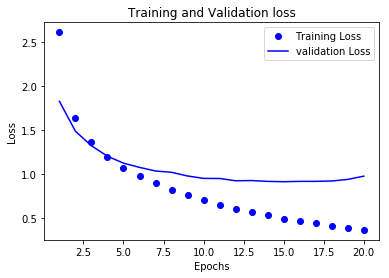

In [33]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
history_dict.keys()
epochs= range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


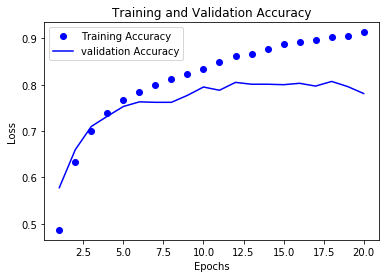

In [34]:
import matplotlib.pyplot as plt

history_dict=history.history
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
history_dict.keys()
epochs= range(1,len(acc_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
result= model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 124us/step


In [36]:
result

[1.019957926479282, 0.7649154051647373]

In [37]:
prediction= model.predict(x_test)
prediction.shape 
prediction[0]

np.argmax(prediction[0])
one_hot_test_labels[0]
test_labels[0]

3